## Challenge: Implement the Nearest Neighbor algorithm

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import neighbors
from sklearn.model_selection import cross_val_score

%matplotlib inline

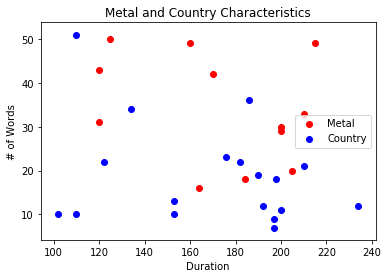

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 120, 186, 122, 197, 200, 182, 102, 125, 
                     205, 110, 120, 110, 197, 153, 210, 192, 210, 160,
                     164, 198, 200, 153, 234, 190, 215, 200, 176, 170]
music['num_words'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 50, 
                      20, 10, 31, 51, 7, 13, 33, 12, 21, 49,
                      16, 18, 30, 10, 12, 19, 49, 11, 23, 42]

# We know whether the songs in our training data are jazz or not.
music['metal'] = [ 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                   1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
                   1, 0, 1, 0, 0, 0, 1, 0, 0, 1]


# Look at our data.
plt.scatter(
    music[music['metal'] == 1].duration,
    music[music['metal'] == 1].num_words,
    color='red'
)
plt.scatter(
    music[music['metal'] == 0].duration,
    music[music['metal'] == 0].num_words,
    color='blue'
)
plt.legend(['Metal', 'Country'])
plt.title('Metal and Country Characteristics')
plt.xlabel('Duration')
plt.ylabel('# of Words')
plt.show()

## Test it against the SKLearn package

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [4]:
X = music[['duration', 'num_words']]
Y = music['metal']
knn.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
knn.predict([[24, 190]])

array([0], dtype=int64)

In [5]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
X = music[['duration', 'num_words']]
Y = music['metal']
knn.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(knn.predict([[24, 190]]))
print(knn.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


## Add weights

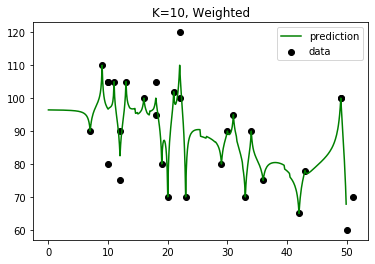

In [6]:
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music['num_words'])
Y = music['bpm']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [7]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.20 (+/- 0.13)
Weighted Accuracy: -0.37 (+/- 1.41)


C:\Users\Steve\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


## Mesh visualization

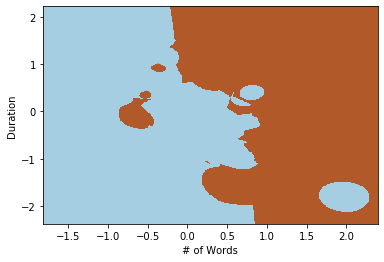

In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'num_words': stats.zscore(music['num_words']),
    'duration': stats.zscore(music['duration'])
})

# Fit our model.
Y = music['metal']
knn.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('# of Words')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()